# Сипаков Вячеслав Всеволодович Лабораторная работа #3

## Набор данных: 5 - titanic
## Классификаторы:
#####     2 - классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)
#####     3 - линейный классификатор (персептрон)

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, classification_report, average_precision_score, roc_curve, auc

#### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [2]:
df = pd.read_csv('!data/titanic3.csv', sep = ';')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.4+ KB


| Переменная | Описание | Тип значения |
| --- | --- | --- |
|pclass    | класс билета | число от 1 до 3
survived  | выжил| 1 - да, 0 - нет
name      |  имя| строка
sex       | пол| 'male' - муж. 'female' - жен
age       | возраст| число
sibsp     | число братьев, сестер, супругов на борту| число
parch     | число родителей, детей на борту | число
ticket    | номер билета | число
fare      | цена билета | число
cabin     | номер каюты | число
embarked  | порт погрузки| число
boat      | номер спасательной шлюпки| число
body      | идентификационный номер тела| число
home.dest | дом.назначение| строка

В качестве класса выберем "survived" - (выжил-не выжил)

#### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [4]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1310, 14)
(1310, 14)


#### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
В качестве классов берем "Выжил" / "Не выжил"

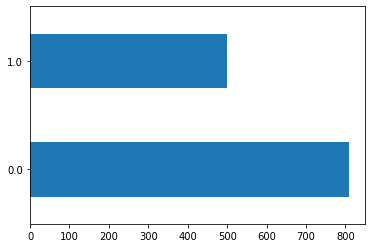

In [5]:
df['survived'].value_counts().plot(kind = 'barh')
plt.show()

Количество элементов в выборках отличается -> классы несбалансированы.

#### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [6]:
useless_attribs = ['body', 'boat', 'name', 'cabin', 'ticket', 'home.dest']
df1 = df
df1.drop(useless_attribs, axis = 1, inplace=True)
def comma_to_dot(obj): # конвертация значений с запятой в значения с точкой
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj
df1['age'] = df['age'].apply(lambda x: comma_to_dot(x))
df1['fare'] = df['fare'].apply(lambda x: comma_to_dot(x))
df1['pclass'] = df['pclass'].apply(lambda x: str(x))

numerical_attributes = [i for i in df.columns if df1[i].dtype.name != 'object']
categorial_attributes = [i for i in df.columns if df[i].dtype.name == 'object']
print('Numerical attributes: ', numerical_attributes)
print('Categorial attributes: ', categorial_attributes)

Numerical attributes:  ['survived', 'age', 'sibsp', 'parch', 'fare']
Categorial attributes:  ['pclass', 'sex', 'embarked']


In [7]:
df1

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C
1308,3.0,0.0,male,29.0000,0.0,0.0,7.8750,S


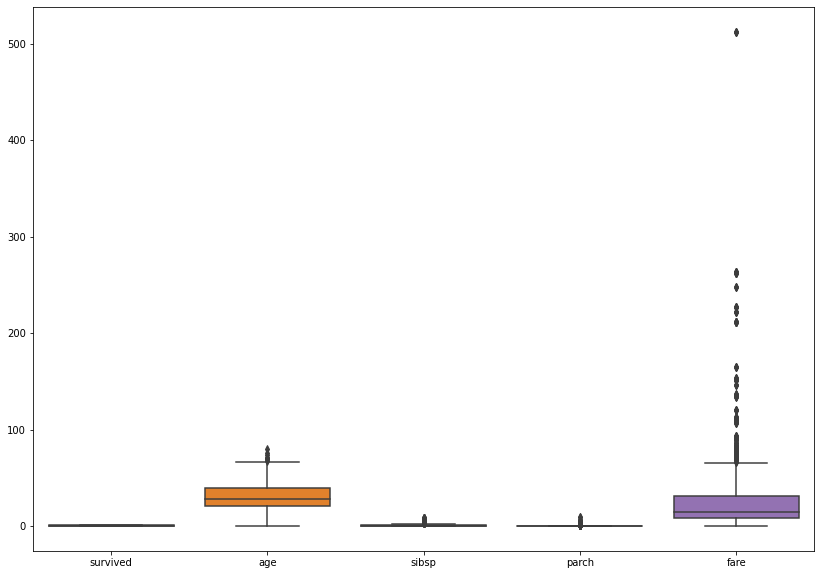

In [8]:
plt.figure(figsize=(14,10))
sns.boxplot(data = df1[numerical_attributes])
plt.show()

In [9]:
df1['age'] = df1['age'].fillna(df1['age'].median()) # заполним пропущенные значения параметра age медианными

df1 = df1.dropna().reset_index(drop = True)

scaler = MinMaxScaler()
df1[numerical_attributes] = scaler.fit_transform(df1[numerical_attributes])
df1

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,0.361169,0.000,0.000000,0.412503,S
1,1.0,1.0,male,0.009395,0.125,0.222222,0.295806,S
2,1.0,0.0,female,0.022964,0.125,0.222222,0.295806,S
3,1.0,0.0,male,0.373695,0.125,0.222222,0.295806,S
4,1.0,0.0,female,0.311064,0.125,0.222222,0.295806,S
...,...,...,...,...,...,...,...,...
1301,3.0,0.0,female,0.179540,0.125,0.000000,0.028213,C
1302,3.0,0.0,female,0.348643,0.125,0.000000,0.028213,C
1303,3.0,0.0,male,0.329854,0.000,0.000000,0.014102,C
1304,3.0,0.0,male,0.336117,0.000,0.000000,0.014102,C


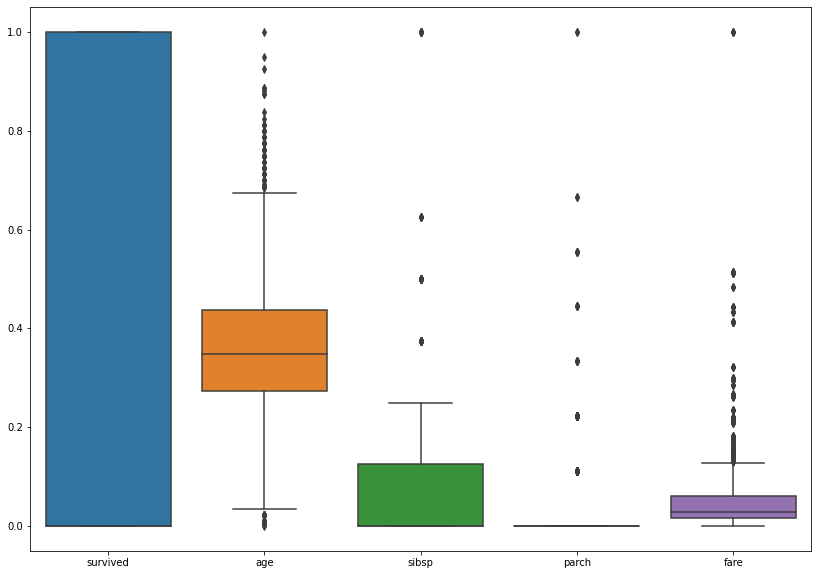

In [10]:
plt.figure(figsize = (14,10))
sns.boxplot(data = df1[numerical_attributes])
plt.show()

In [11]:
# выделим бинарные и небинарные признаки
binary_attributes = [i for i in categorial_attributes if len(df1[i].unique()) == 2]
nonbinary_attributes = [i for i in categorial_attributes if len(df1[i].unique()) > 2]

print('binary_attributes:')
for i in binary_attributes:
    print(i,': ', df1[i].unique())
    
print('nonbinary_attributes:')
for i in nonbinary_attributes:
    print(i,': ', df1[i].unique())
    
# для бинарных заменим значения на 1 и 0
for attr in binary_attributes:
    for i, unique_item in enumerate(df1[attr].unique()):
        df1[attr] = df1[attr].replace(to_replace=[unique_item], value = [i])
        
# для небинарных применим dummy-кодирование
df1_nonbinary = pd.get_dummies(df1[nonbinary_attributes])
df1.drop(nonbinary_attributes, axis = 1, inplace = True)
df1 = pd.concat([df1_nonbinary, df1] , axis = 1)

print(df1.shape)

binary_attributes:
sex :  ['female' 'male']
nonbinary_attributes:
pclass :  ['1.0' '2.0' '3.0']
embarked :  ['S' 'C' 'Q']
(1306, 12)


#### 6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

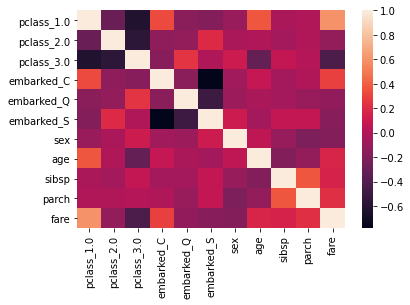

In [12]:
df_corr = df1.drop('survived', axis = 1).corr()
sns.heatmap(df_corr)
plt.show()

In [13]:
df_corr

,pclass_1.0,pclass_2.0,pclass_3.0,embarked_C,embarked_Q,embarked_S,sex,age,sibsp,parch,fare
pclass_1.0,1.000000,-0.296187,-0.621156,0.327767,-0.165809,-0.183808,-0.103873,0.368133,-0.033275,-0.012070,0.599391
pclass_2.0,-0.296187,1.000000,-0.564545,-0.135364,-0.122409,0.197470,-0.029691,-0.001146,-0.053019,-0.010592,-0.120768
pclass_3.0,-0.621156,-0.564545,1.000000,-0.172182,0.243725,-0.003181,0.114126,-0.317193,0.072258,0.019121,-0.418890
embarked_C,0.327767,-0.135364,-0.172182,1.000000,-0.164612,-0.778110,-0.067451,0.077591,-0.048985,-0.009161,0.287211
embarked_Q,-0.165809,-0.122409,0.243725,-0.164612,1.000000,-0.491473,-0.089284,-0.029903,-0.049051,-0.101308,-0.129705
embarked_S,-0.183808,0.197470,-0.003181,-0.778110,-0.491473,1.000000,0.116413,-0.049465,0.074487,0.072603,-0.170991
sex,-0.103873,-0.029691,0.114126,-0.067451,-0.089284,0.116413,1.000000,0.055929,-0.110529,-0.214179,-0.184034
age,0.368133,-0.001146,-0.317193,0.077591,-0.029903,-0.049465,0.055929,1.000000,-0.188884,-0.124578,0.177627
sibsp,-0.033275,-0.053019,0.072258,-0.048985,-0.049051,0.074487,-0.110529,-0.188884,1.000000,0.373281,0.161030
parch,-0.012070,-0.010592,0.019121,-0.009161,-0.101308,0.072603,-0.214179,-0.124578,0.373281,1.000000,0.222327


#### 7. Заполните пропущенные значения в данных 

In [14]:
df1.count()

pclass_1.0    1306
pclass_2.0    1306
pclass_3.0    1306
embarked_C    1306
embarked_Q    1306
embarked_S    1306
survived      1306
sex           1306
age           1306
sibsp         1306
parch         1306
fare          1306
dtype: int64

#### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества)

In [15]:
# разделим полученные данные на данные для обучения и теста
x, y = df1.drop('survived', axis = 1), df1['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

##### Метод K ближайших соседей (радиус)

In [16]:
# промежуточная классификация
rnc = RadiusNeighborsClassifier(outlier_label = 1)
params = {'radius': np.arange(0, 5, 0.25)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(x_train, y_train)
#print(rnc_grid)

# поиск оптимального радиуса
best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

# классификация с использованием оптимальных параметров
rnc = RadiusNeighborsClassifier(outlier_label = 1, radius = best_radius)
rnc.fit(x_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(x_test))
print('test score: ', best_score)

best train score: 0.7900018014772112 	 at radius: 0.5
test score:  0.8290816326530612


##### Линейный классификатор (персептрон)

In [17]:
perc = Perceptron()
perc.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
paramsearch = GridSearchCV(estimator = perc, param_grid = dict(alpha = np.linspace(0,2,20)[1:], max_iter = [int(50)]), n_jobs = int(10))
paramsearch.fit(x_train, y_train)

# поиск оптимальных параметров
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
print('best train score: ', best_score, 'at alpha', selected_alpha)
best_n_iter = paramsearch.best_estimator_.max_iter
best_n_jobs = paramsearch.best_estimator_.n_jobs

# классификация с использованием оптимальных параметров
dtc = Perceptron(alpha = selected_alpha, max_iter = best_n_iter, n_jobs = best_n_jobs)
dtc.fit(x_train, y_train)
test_score = np.mean(y_test == dtc.predict(x_test))
print('test score: ', test_score)

best train score:  0.703614964270702 at alpha 0.10526315789473684
test score:  0.7066326530612245


In [19]:
plt.figure(figsize = (10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop = True)):
    y_test_invers.append(1 - y)
    
probas_rnc0 = rnc.fit(x_train, y_train).predict_proba (x_test)
probas_rnc1 = rnc.fit(x_train, y_train).predict_proba (x_test)

clf_isotonic = CalibratedClassifierCV(perc, cv = 10, method = 'isotonic')
clf_isotonic.fit(x_train, y_train)
probas_perc0 = clf_isotonic.predict_proba(x_test)
clf_isotonic.fit(x_train, y_train)
probas_perc1 = clf_isotonic.predict_proba(x_test)

<Figure size 720x576 with 0 Axes>

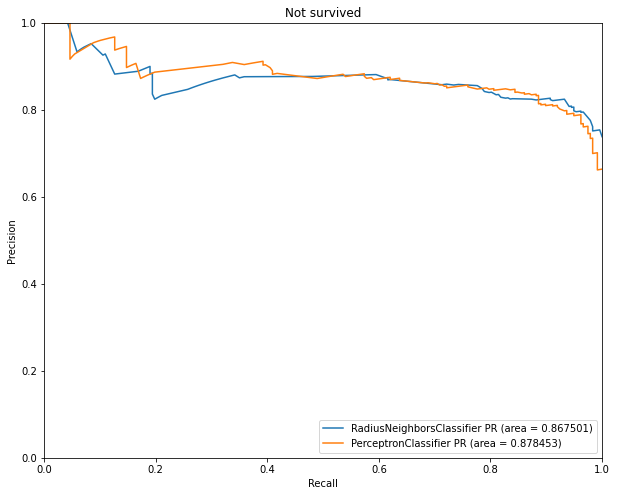

In [20]:
plt.figure(figsize = (10,8))

# K соседей (радиус)
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc1[:,0])
aps_rnc1 = average_precision_score(y_test_invers,probas_rnc1[:,0])
plt.plot(recall, precision, label = '%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc1))

# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_perc1[:,0])
aps_perc1 = average_precision_score(y_test_invers, probas_perc1[:,0])
plt.plot(recall, precision, label = '%s PR (area = %f)' % ('PerceptronClassifier',  aps_perc1))

# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 4, fontsize = 'medium')
plt.title('Not survived')
plt.show()

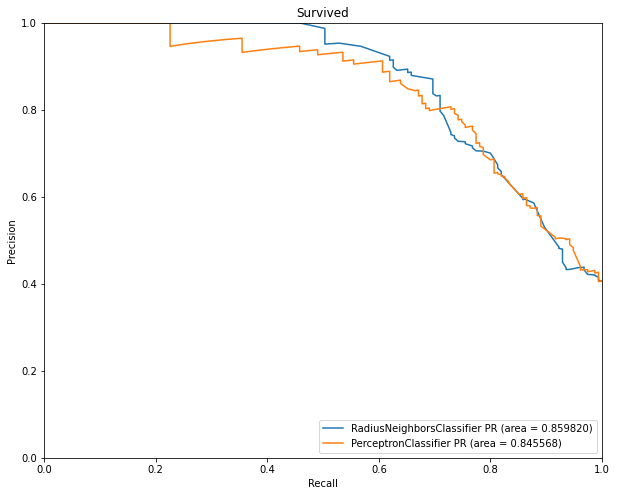

In [21]:
plt.figure(figsize = (10,8))

# K соседей (радиус)
precision, recall, thresholds = precision_recall_curve(y_test, probas_rnc0[:,1])
aps_rnc0 = average_precision_score(y_test,probas_rnc0[:,1])
plt.plot(recall, precision, label = '%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc0))

# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test, probas_perc1[:,1])
aps_perc1 = average_precision_score(y_test,probas_perc1[:,1])
plt.plot(recall, precision, label = '%s PR (area = %f)' % ('PerceptronClassifier',  aps_perc1))

# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 4, fontsize = 'medium')
plt.title('Survived')
plt.show()

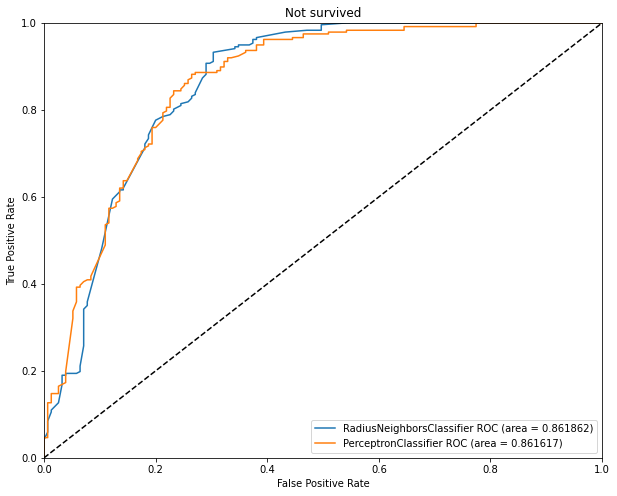

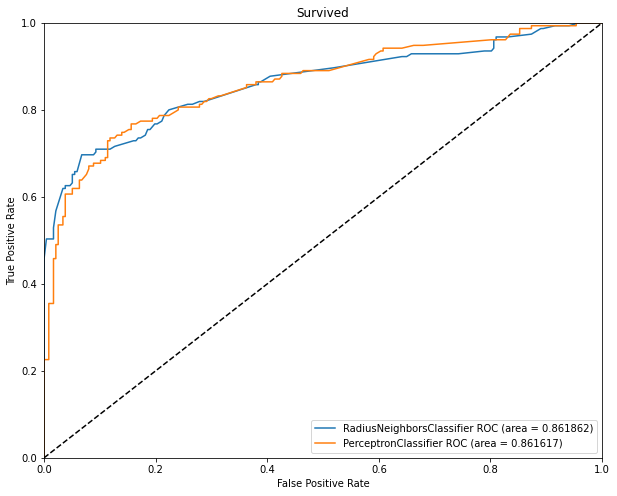

In [22]:
### ROC графики

## класс погибших
plt.figure(figsize = (10,8))

# K соседей (радиус)
tpr, fpr, thresholds = roc_curve(y_test, probas_rnc0[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = '%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

# Персептрон
tpr, fpr, thresholds = roc_curve(y_test, probas_perc0[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = '%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.title('Not survived')
plt.show()

## класс выживших
plt.figure(figsize = (10,8))

# K соседей
fpr, tpr, thresholds = roc_curve(y_test, probas_rnc1[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = '%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))

# PerceptronClassifier
fpr, tpr, thresholds = roc_curve(y_test, probas_perc1[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = '%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.title('Survived')
plt.show()

#### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы

Классификаторы персептрон и соседей в радиусе имеют примерно одинаковую площадь под кривыми PR и ROC, т. е. относительно равны по точности. Они решают задачу классификации в ~85% случаев, что является неплохим результатом.